<a href="https://colab.research.google.com/github/tharunpraveen/ML/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Problem

For this example, we are trying to predict how much an individual customer will spend during a black Friday sale. This type of modeling is particularly useful for pricing campaigns and creating deals for specific customers.

# Importing the relevant libraries

In [4]:
import numpy as np
import pandas as pd


##importing data


# Data Preprocessing

### Importing the Database

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
raw_data=pd.read_csv('/content/drive/MyDrive/ml_datasource[1].csv')
data=raw_data.copy()
data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


### Removing Outliers

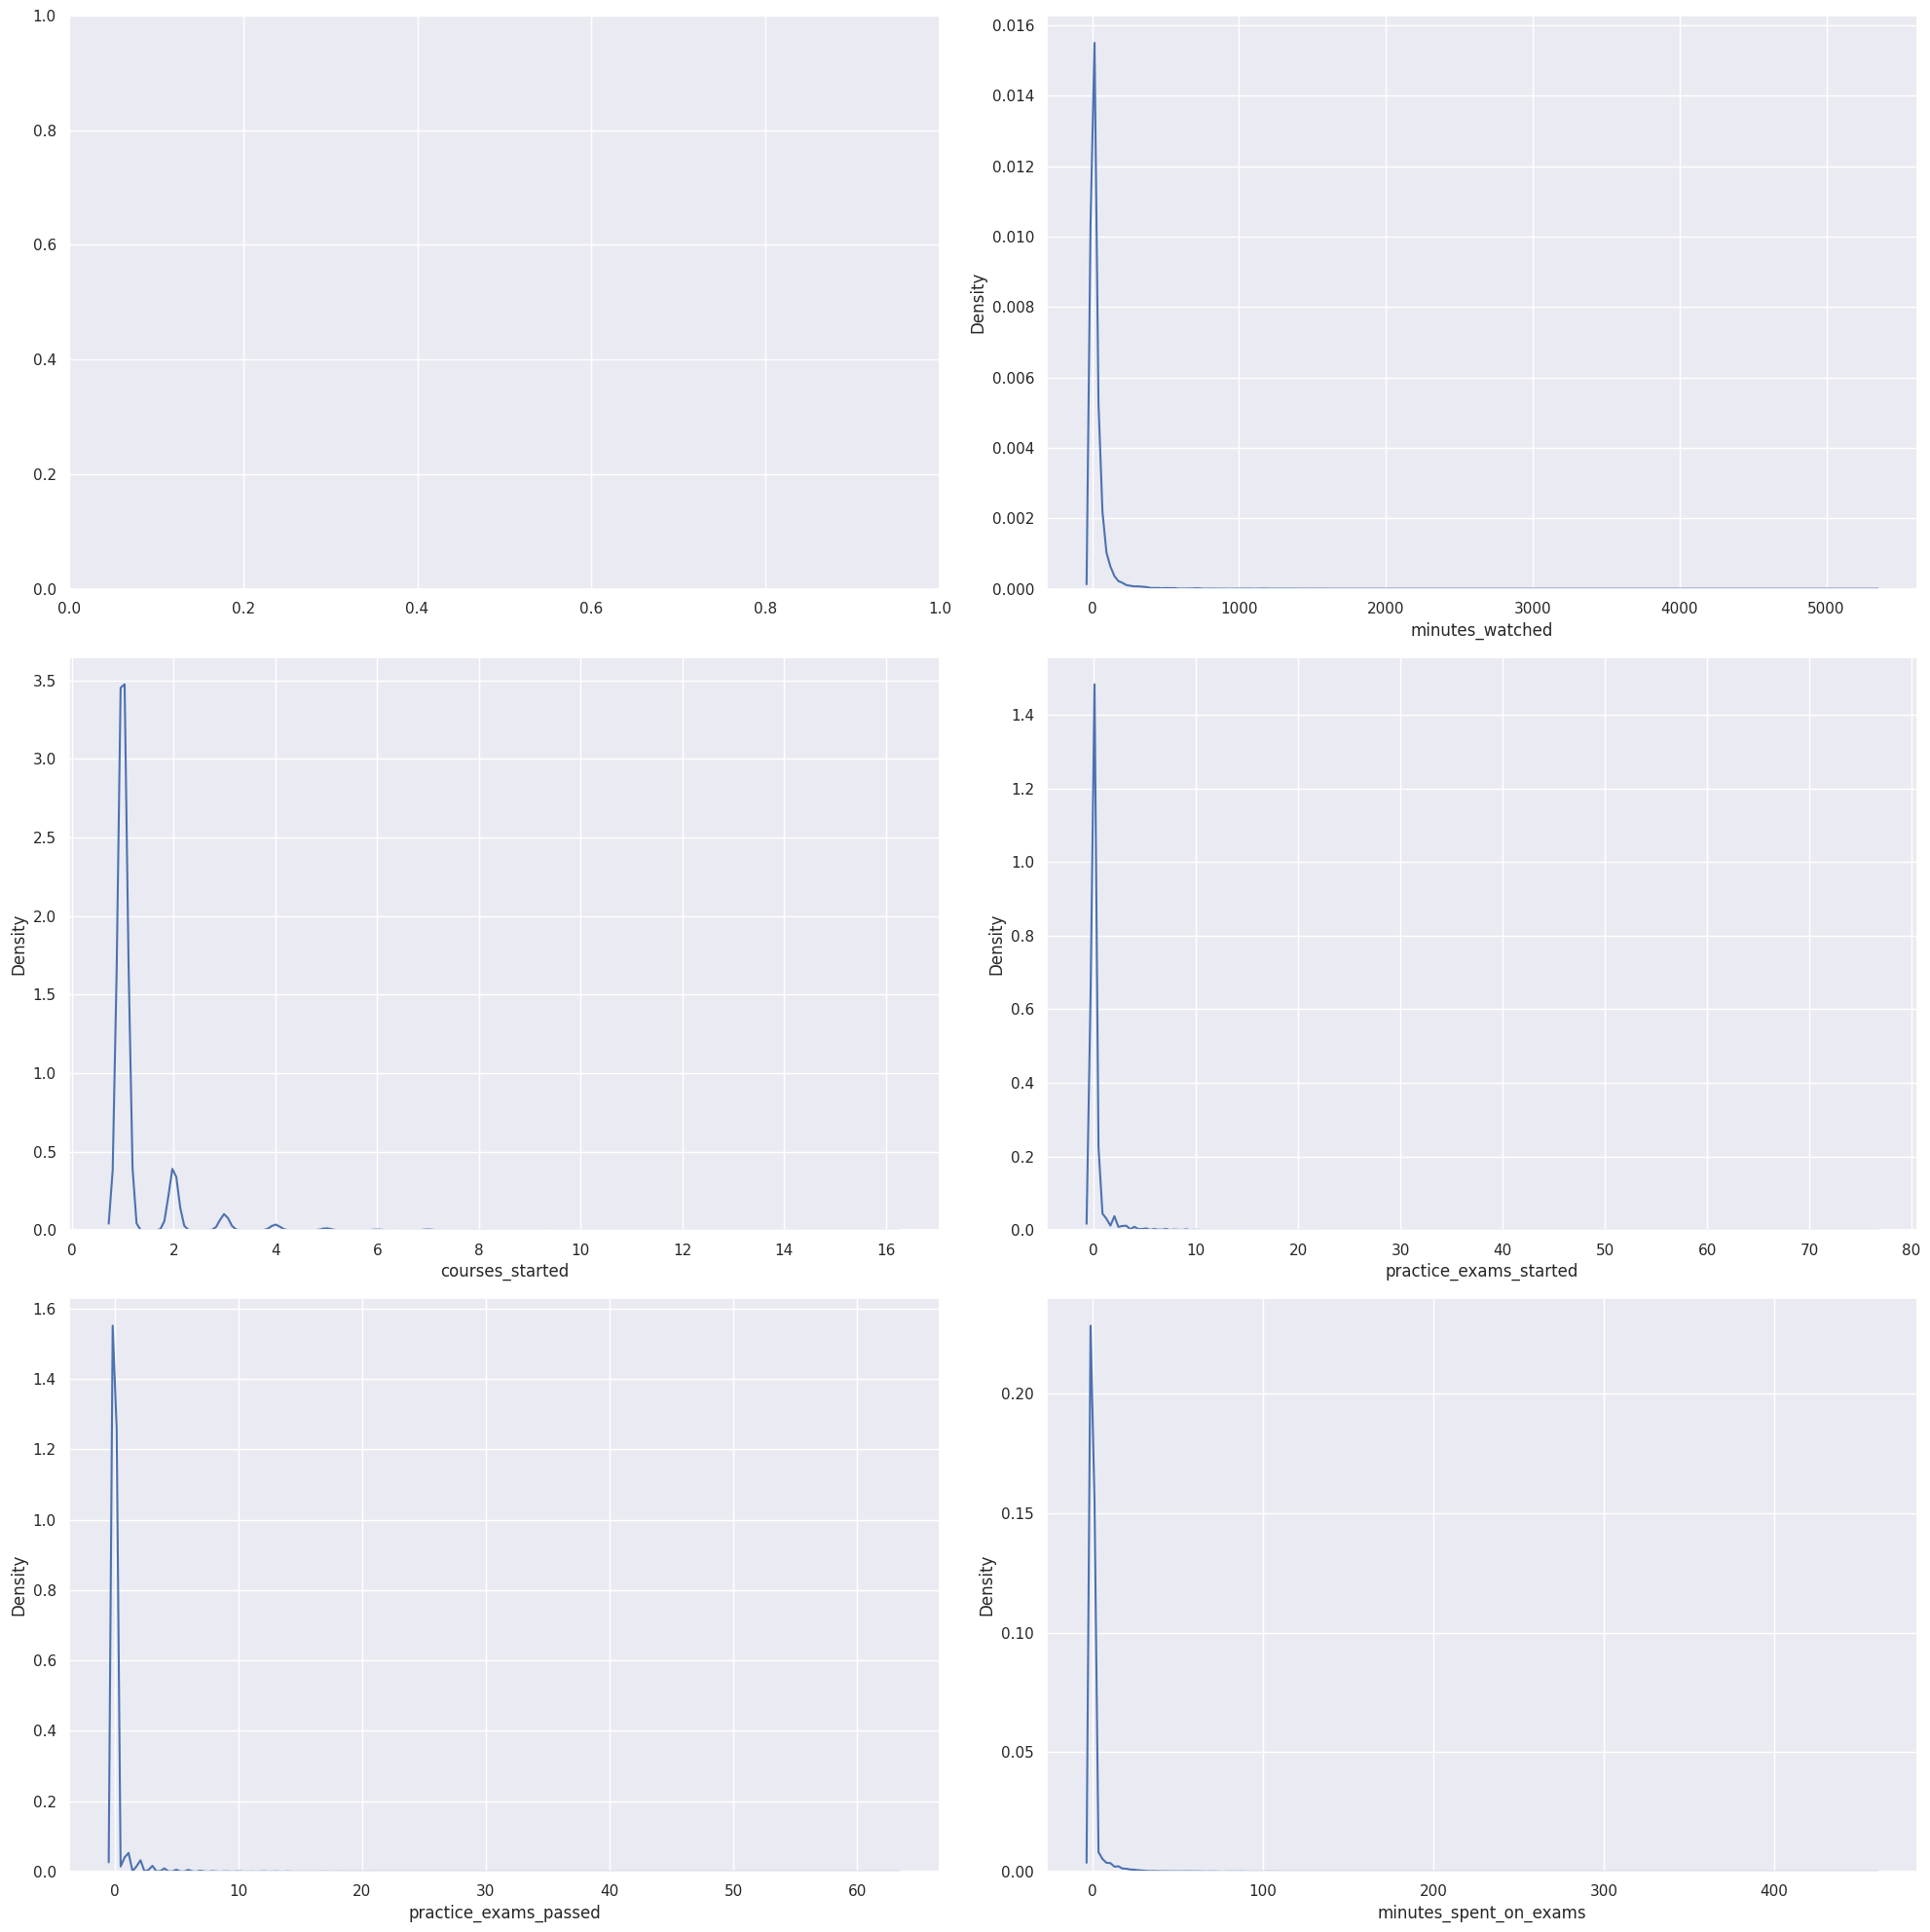

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# creating subplots
fig,axes=plt.subplots(3,2,figsize=(20,20))

#plot kde plot for different colums

sns.kdeplot(data=data,x='minutes_watched',ax=axes[0,1])
sns.kdeplot(data=data,x='courses_started',ax=axes[1,0])
sns.kdeplot(data=data,x='practice_exams_started',ax=axes[1,1])
sns.kdeplot(data=data,x='practice_exams_passed',ax=axes[2,0])
sns.kdeplot(data=data,x='minutes_spent_on_exams',ax=axes[2,1])

plt.tight_layout()
plt.show()

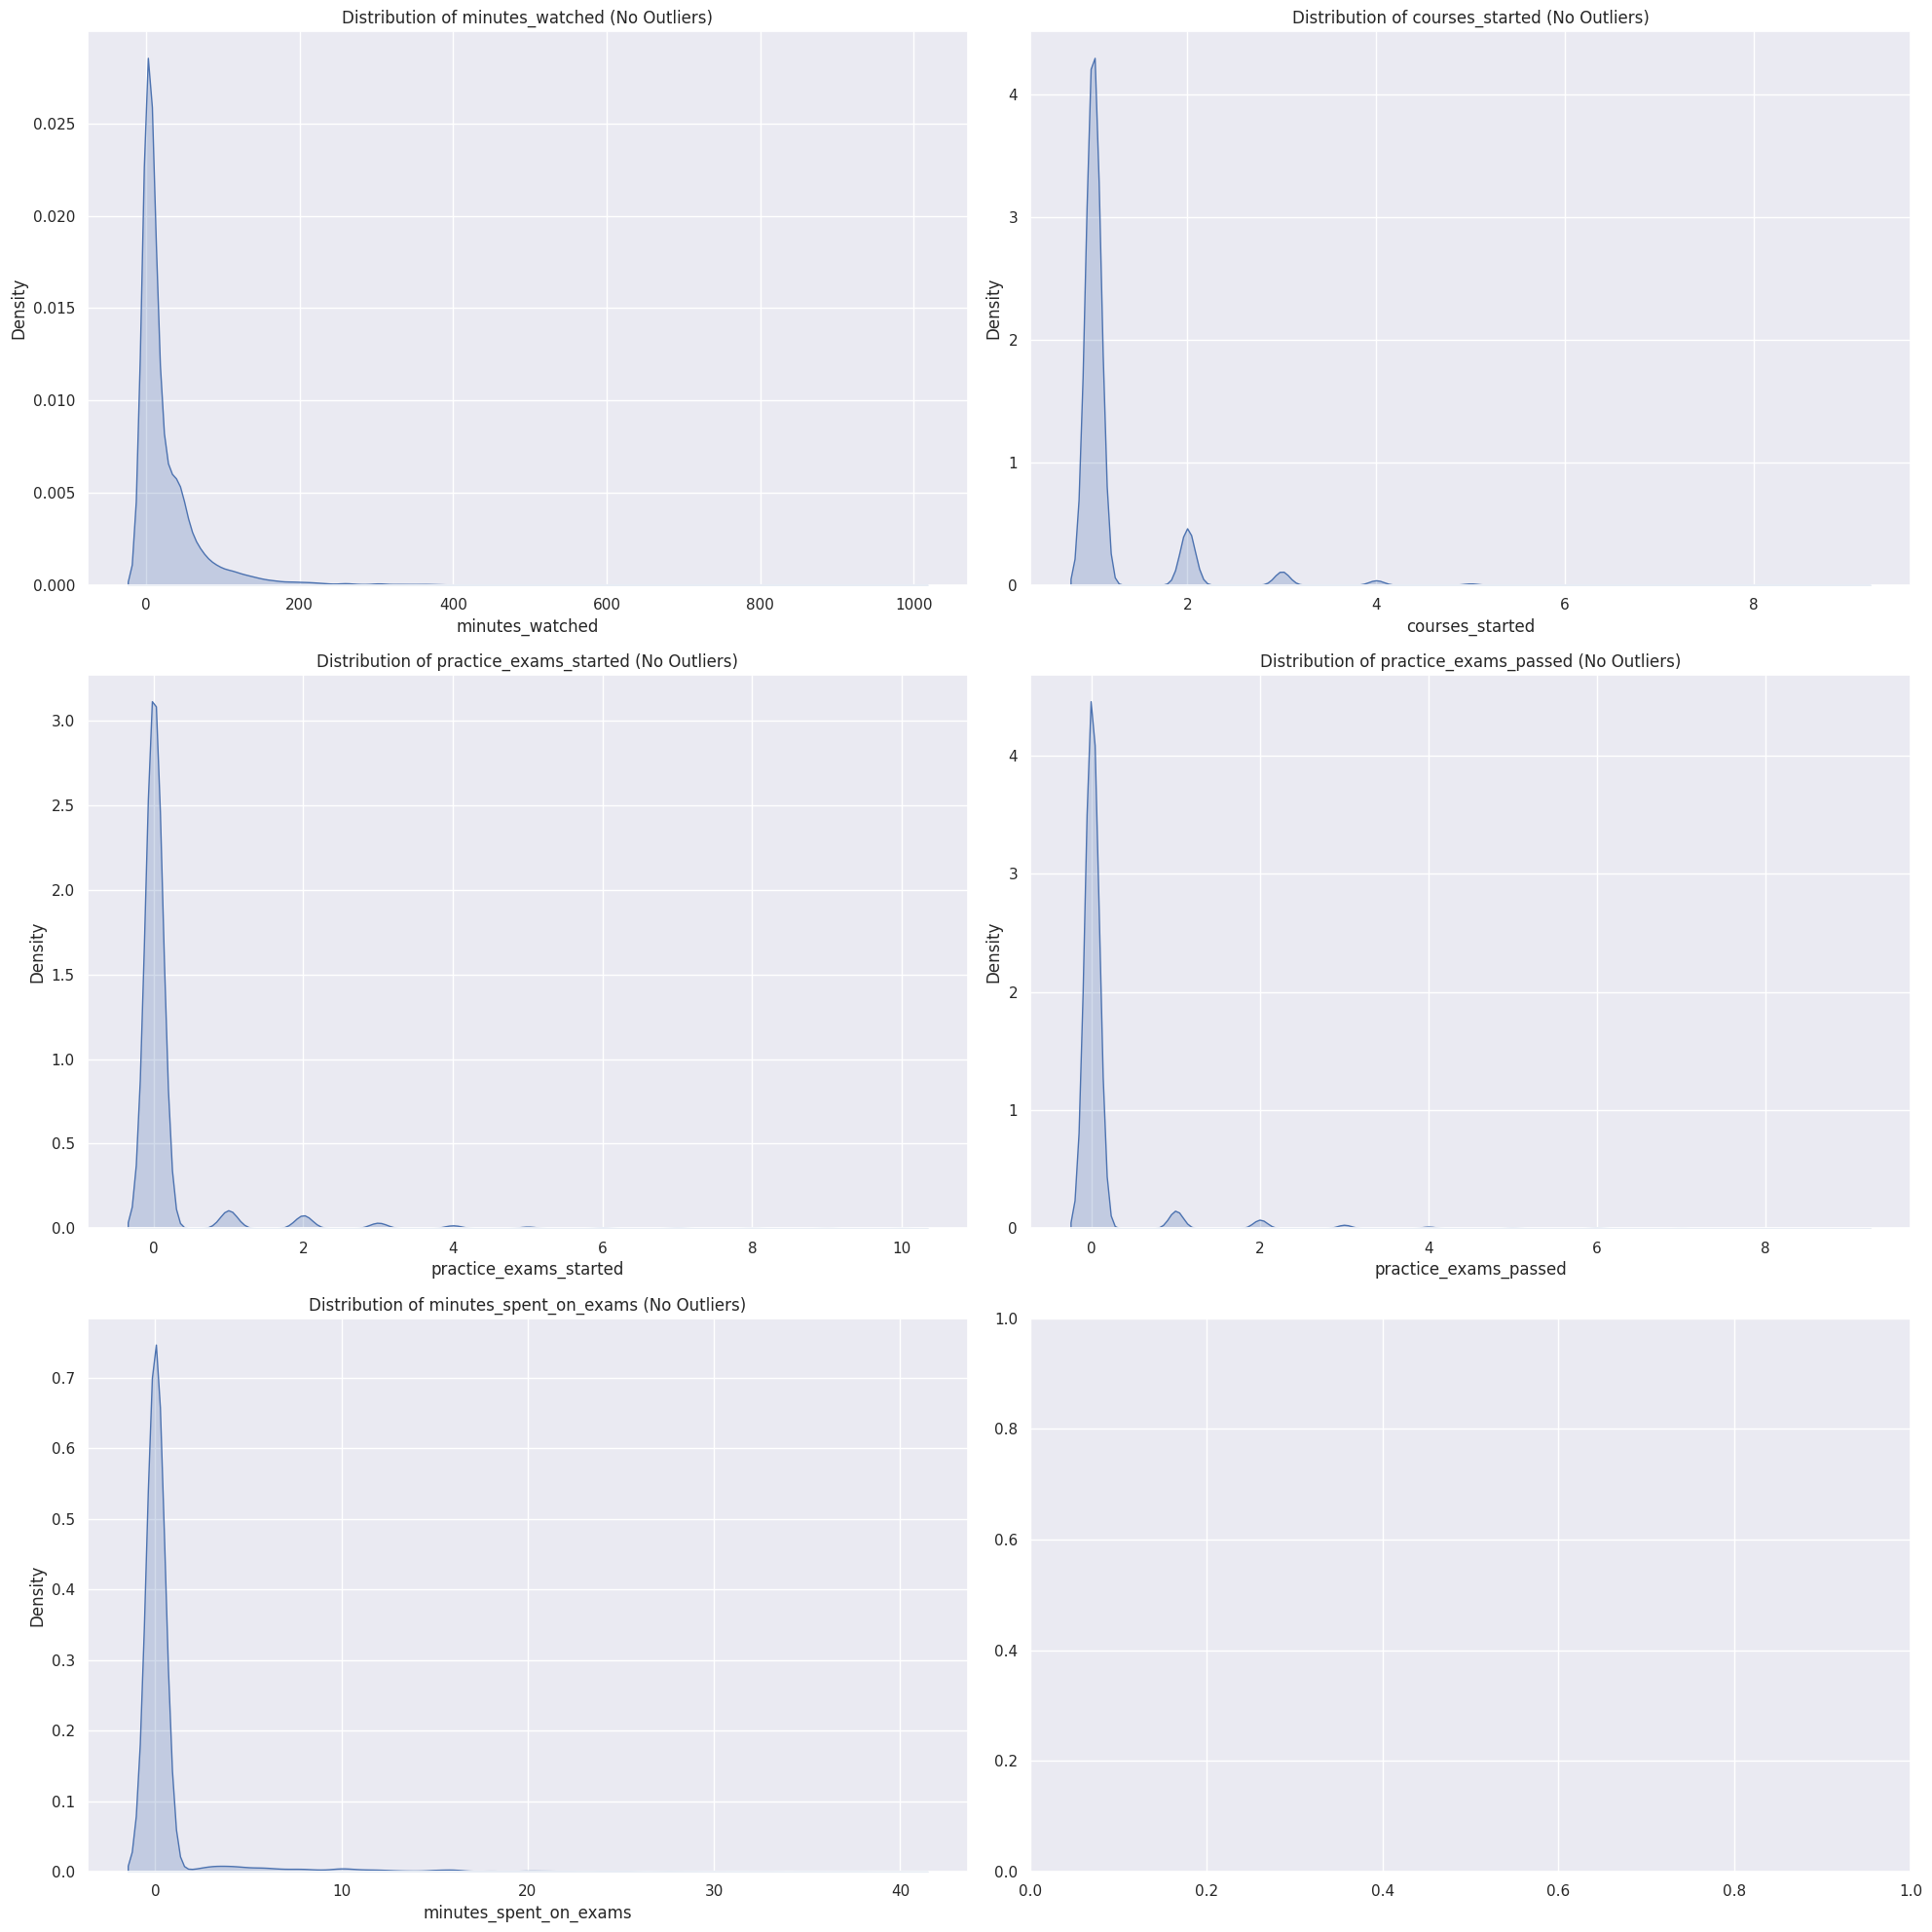

<ipython-input-24-7bef4bb7bf44>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['purchased']=data['purchased']


In [24]:
# Filter out the outliers based on the provided thresholds
data_no_outliers = raw_data[
    (raw_data["minutes_watched"] <= 1000) &
    (raw_data["courses_started"] <= 10) &
    (raw_data["practice_exams_started"] <= 10) &
    (raw_data["minutes_spent_on_exams"] <= 40)
]
features=[
    'minutes_watched',
    'courses_started',
    'practice_exams_started',
    'practice_exams_passed',
    'minutes_spent_on_exams'
]

# Replot the distributions for the filtered dataset
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.kdeplot(data=data_no_outliers[feature], ax=axes[row, col], fill=True)
    axes[row, col].set_title(f"Distribution of {feature} (No Outliers)")

plt.tight_layout()
plt.show()

# Check the percentage of data retained
percent_retained = (len(data_no_outliers) / len(raw_data)) * 100
percent_retained#for following thumb rule of 95%


### Checking for Multicollinearity

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define the numerical features for VIF calculation
features = [
    'minutes_watched',
    'courses_started',
    'practice_exams_started',
    'practice_exams_passed',
    'minutes_spent_on_exams'
]

# Step 1: Prepare data for VIF calculation (excluding 'student_country')
X = data_no_outliers[features]

# Step 2: Calculate VIF for initial features
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("Initial VIF Values:\n", vif_data)

# Step 3: Iteratively remove features with high VIF
while vif_data['VIF'].max() > 5:
    # Find feature with highest VIF
    feature_to_remove = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
    print(f"Removing feature: {feature_to_remove} (VIF = {vif_data['VIF'].max()})")

    # Remove feature from data
    X = X.drop(columns=[feature_to_remove])

    # Recalculate VIF for remaining features
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    print("Updated VIF Values:\n", vif_data)

# Step 4: Include 'student_country' column in the final dataset
data_no_mult = X.copy()
data_no_mult['student_country'] = data_no_outliers['student_country']
data_no_mult['purchased']=data['purchased']

print("\nFinal DataFrame with no multicollinearity (data_no_mult):")
print(data_no_mult.head())


Initial VIF Values:
                   feature        VIF
0         minutes_watched   1.740155
1         courses_started   1.539748
2  practice_exams_started  10.196074
3   practice_exams_passed   7.811401
4  minutes_spent_on_exams   3.338544
Removing feature: practice_exams_started (VIF = 10.196073765849407)
Updated VIF Values:
                   feature       VIF
0         minutes_watched  1.739392
1         courses_started  1.538459
2   practice_exams_passed  2.561989
3  minutes_spent_on_exams  2.592201

Final DataFrame with no multicollinearity (data_no_mult):
   minutes_watched  courses_started  practice_exams_passed  \
0            358.1                1                      2   
1              1.7                1                      0   
2             22.4                1                      0   
3             18.8                1                      1   
4            118.0                2                      1   

   minutes_spent_on_exams student_country  purchased  
0

### Dealing with NaN Values

In [29]:
data_no_mult.isna().sum()


,0
minutes_watched,0
courses_started,0
practice_exams_passed,0
minutes_spent_on_exams,0
student_country,8
purchased,0


In [30]:
data_no_nulls=data_no_mult.fillna('NAM')
data_no_nulls.isna().sum()

,0
minutes_watched,0
courses_started,0
practice_exams_passed,0
minutes_spent_on_exams,0
student_country,0
purchased,0


### Splitting the Data

In [52]:
from sklearn.model_selection import train_test_split
x=data_no_nulls.iloc[:,:-1]
y=data_no_nulls.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,  # 20% for testing
                                                    random_state=365,  # Set random seed
                                                    stratify=y)  # Stratify by target variable

### Encoding the Data

In [53]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Initialize the OrdinalEncoder with specified parameters
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=170)

# Step 1: Fit and transform the 'student_country' column in the training data
x_train['student_country_enc'] = enc.fit_transform(
    x_train['student_country'].to_numpy().reshape(-1, 1)
)

# Step 2: Transform the 'student_country' column in the testing data
x_test['student_country_enc'] = enc.transform(
    x_test['student_country'].to_numpy().reshape(-1, 1)
)

# Step 3: Drop the original 'student_country' column from both training and testing datasets
x_train = x_train.drop(columns=['student_country'])
x_test = x_test.drop(columns=['student_country'])

# Step 4: Convert the datasets to numpy arrays for compatibility
x_train_array = np.asarray(x_train, dtype='float')
y_train_array = np.asarray(y_train, dtype='int')
x_test_array = np.asarray(x_test, dtype='float')
y_test_array = np.asarray(y_test, dtype='int')

# Verify the transformed data
print("Encoded Training Data (first 5 rows):\n", x_train_array[:5])
print("Encoded Test Data (first 5 rows):\n", x_test_array[:5])


Encoded Training Data (first 5 rows):
 [[  1.6   2.    0.    0.   69. ]
 [ 75.5   1.    0.    0.   69. ]
 [ 44.4   1.    0.    0.   84. ]
 [  2.6   1.    0.    0.  148. ]
 [  1.    1.    0.    0.   80. ]]
Encoded Test Data (first 5 rows):
 [[  0.7   1.    0.    0.   68. ]
 [ 65.7   2.    0.    0.   46. ]
 [ 65.4   4.    0.    0.   12. ]
 [  1.4   1.    0.    0.  153. ]
 [  0.3   1.    0.    0.   46. ]]


# Creating a Logistic Regression Model

Optimization terminated successfully.
         Current function value: 0.316561
         Iterations 7
Logistic Regression Summary:

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14095
Method:                           MLE   Df Model:                            4
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                -0.02969
Time:                        01:23:57   Log-Likelihood:                -4463.5
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0144      0.001     26.506      0.000       0.013       0.015

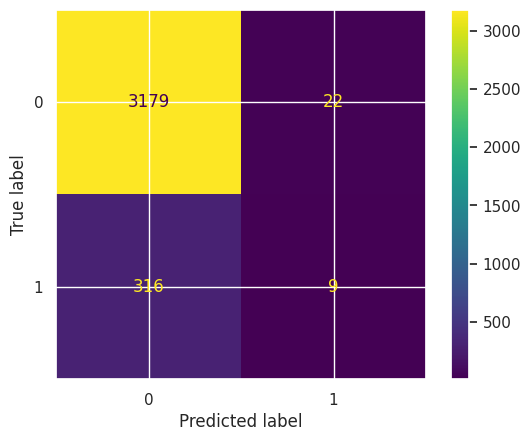

In [49]:
import statsmodels.api as sm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Step 1: Set up the logistic regression model
log_reg = sm.Logit(y_train_array, x_train_array)

# Step 2: Fit the logistic regression model
log_reg_results = log_reg.fit()

# Step 3: Display the summary of the logistic regression results
print("Logistic Regression Summary:\n")
print(log_reg_results.summary())

# Step 4: Make predictions on the test dataset
# Predicted probabilities
y_pred_prob = log_reg_results.predict(x_test_array)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Step 5: Generate and display the confusion matrix
# Create the confusion matrix
cm = confusion_matrix(y_test_array, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Output confusion matrix for further inspection
print("Confusion Matrix:\n", cm)


# Creating a K-Nearest Neighbors Model

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'n_neighbors': 28, 'weights': 'uniform'}
Best Cross-Validated Accuracy: 0.9093617021276597


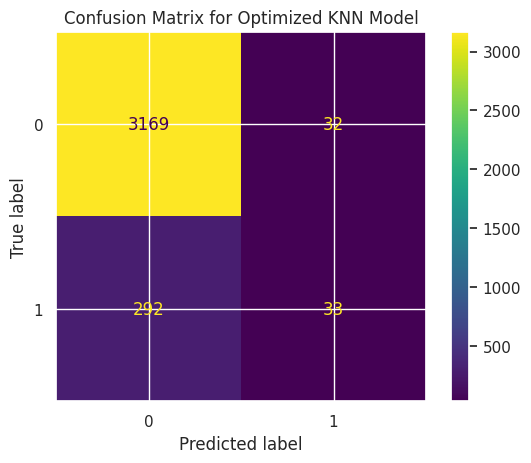

Classification Report:
                  precision    recall  f1-score   support

No Subscription       0.92      0.99      0.95      3201
   Subscription       0.51      0.10      0.17       325

       accuracy                           0.91      3526
      macro avg       0.71      0.55      0.56      3526
   weighted avg       0.88      0.91      0.88      3526



In [54]:
# Import required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np

# Define the parameter grid
parameters_knn = {
    'n_neighbors': np.arange(1, 51),  # Number of neighbors from 1 to 50
    'weights': ['uniform', 'distance']  # Uniform and distance weights
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=parameters_knn,
    scoring='accuracy',  # Use accuracy as the metric for evaluation
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Utilize all available CPU cores
)

# Fit the grid search object to the training data
grid_search_knn.fit(x_train_array, y_train_array)

# Get the best estimator
knn_clf = grid_search_knn.best_estimator_

# Display the best parameters and corresponding accuracy
print("Best Parameters:", grid_search_knn.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_knn.best_score_)

# Predict on the test data
y_test_pred_knn = knn_clf.predict(x_test_array)

# Build and display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_knn)
plt.title("Confusion Matrix for Optimized KNN Model")
plt.show()

# Generate the classification report
report = classification_report(y_test_array, y_test_pred_knn, target_names=["No Subscription", "Subscription"])
print("Classification Report:\n", report)


# Creating a Support Vector Machines Model

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


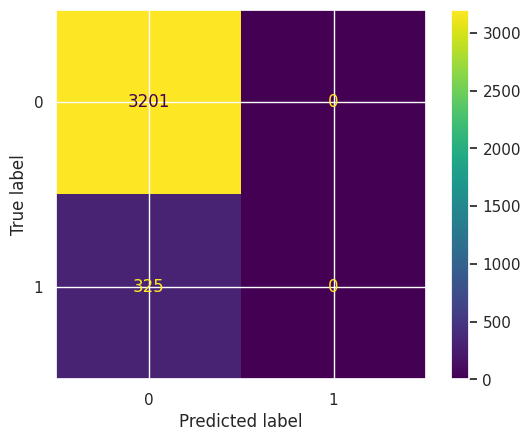

Classification Report:

                 precision    recall  f1-score   support

No Subscription       0.91      1.00      0.95      3201
   Subscription       0.00      0.00      0.00       325

       accuracy                           0.91      3526
      macro avg       0.45      0.50      0.48      3526
   weighted avg       0.82      0.91      0.86      3526



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Scale the features
scaler = MinMaxScaler(feature_range=(-1, 1))

# Scale the training and test data
x_train_scaled = scaler.fit_transform(x_train_array)
x_test_scaled = scaler.transform(x_test_array)

# Step 2: Define the parameter grid for SVM
parameters_svm = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': range(1, 11),
    'gamma': ['scale', 'auto']
}

# Step 3: Initialize GridSearchCV with SVC
grid_search_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=parameters_svm,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Step 4: Fit the grid search object to the training data
grid_search_svm.fit(x_train_scaled, y_train_array)

# Step 5: Retrieve the best model
svm_clf = grid_search_svm.best_estimator_
print(f"Best Parameters: {grid_search_svm.best_params_}")

# Step 6: Use the optimized SVM model to make predictions
y_test_pred_svm = svm_clf.predict(x_test_scaled)

# Step 7: Evaluate the model
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_svm)
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test_array, y_test_pred_svm, target_names=['No Subscription', 'Subscription']))


# Creating a Decision Trees Model

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'ccp_alpha': 0.001}


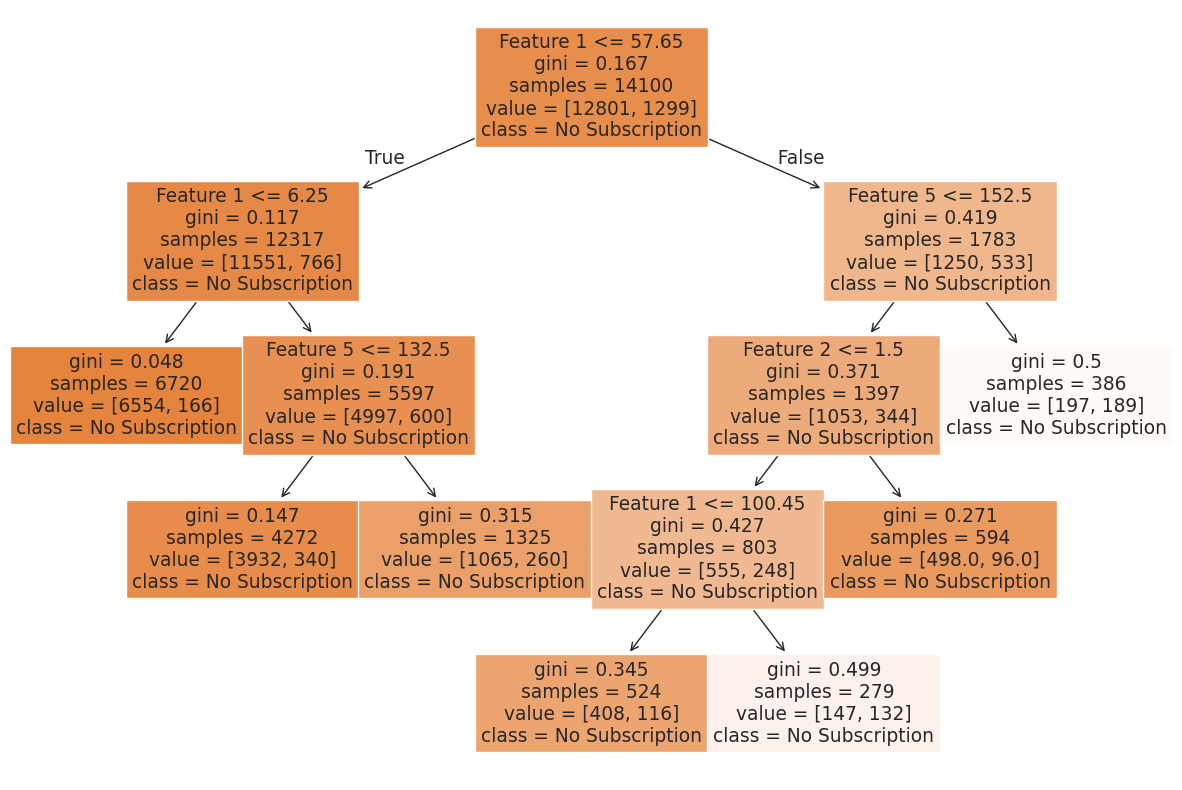

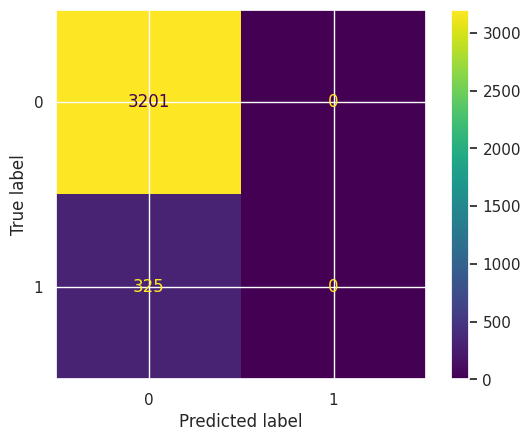

Classification Report:

                 precision    recall  f1-score   support

No Subscription       0.91      1.00      0.95      3201
   Subscription       0.00      0.00      0.00       325

       accuracy                           0.91      3526
      macro avg       0.45      0.50      0.48      3526
   weighted avg       0.82      0.91      0.86      3526



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Define the parameter grid for ccp_alpha
parameters_dt = {
    'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]
}

# Step 2: Initialize DecisionTreeClassifier and GridSearchCV
dt_classifier = DecisionTreeClassifier(random_state=365)

grid_search_dt = GridSearchCV(
    estimator=dt_classifier,
    param_grid=parameters_dt,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Step 3: Fit the grid search object to the training data
grid_search_dt.fit(x_train_array, y_train_array)

# Step 4: Retrieve the best decision tree model
dt_best_model = grid_search_dt.best_estimator_
print(f"Best Parameters: {grid_search_dt.best_params_}")

# Step 5: Visualize the Decision Tree
# Ensure x_train_array is a pandas DataFrame and get the feature names
if isinstance(x_train_array, pd.DataFrame):
    feature_names = x_train_array.columns
else:
    # If it's not a DataFrame, create feature names manually
    feature_names = [f'Feature {i+1}' for i in range(x_train_array.shape[1])]

plt.figure(figsize=(15, 10))
plot_tree(dt_best_model, filled=True, feature_names=feature_names, class_names=['No Subscription', 'Subscription'])
plt.show()

# Step 6: Use the best decision tree model to make predictions
y_test_pred_dt = dt_best_model.predict(x_test_array)

# Step 7: Evaluate the model
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_dt)
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test_array, y_test_pred_dt, target_names=['No Subscription', 'Subscription']))


# Creating a Random Forests Model

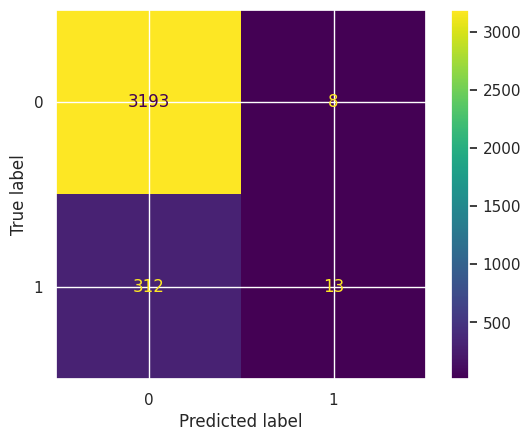

Classification Report:

                 precision    recall  f1-score   support

No Subscription       0.91      1.00      0.95      3201
   Subscription       0.62      0.04      0.08       325

       accuracy                           0.91      3526
      macro avg       0.77      0.52      0.51      3526
   weighted avg       0.88      0.91      0.87      3526



In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Create an instance of RandomForestClassifier with the best ccp_alpha
best_ccp_alpha = grid_search_dt.best_params_['ccp_alpha']

rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Default number of trees
    random_state=365,
    ccp_alpha=best_ccp_alpha  # Use the best ccp_alpha from the Decision Tree model
)

# Step 2: Fit the Random Forest model using the training data
rf_classifier.fit(x_train_array, y_train_array)

# Step 3: Make predictions on the test data
y_test_pred_rf = rf_classifier.predict(x_test_array)

# Step 4: Evaluate the model
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_rf)
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test_array, y_test_pred_rf, target_names=['No Subscription', 'Subscription']))
